### Постройте топ фильмов в категориях Action и Comedy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [4]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [8]:
# соединим таблицу с рейтингами и названиями фильмов
joined_ratings = ratings.join(movies.set_index('movieId'),on='movieId')

In [9]:
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## Genre Action

выберем только те фильмы, которые содержат жанр action

In [30]:
r_actions = joined_ratings[joined_ratings.apply(lambda x:'Action' in x['genres'],axis = 1)]

In [35]:
%config InlineBackend.figure_format = 'retina'

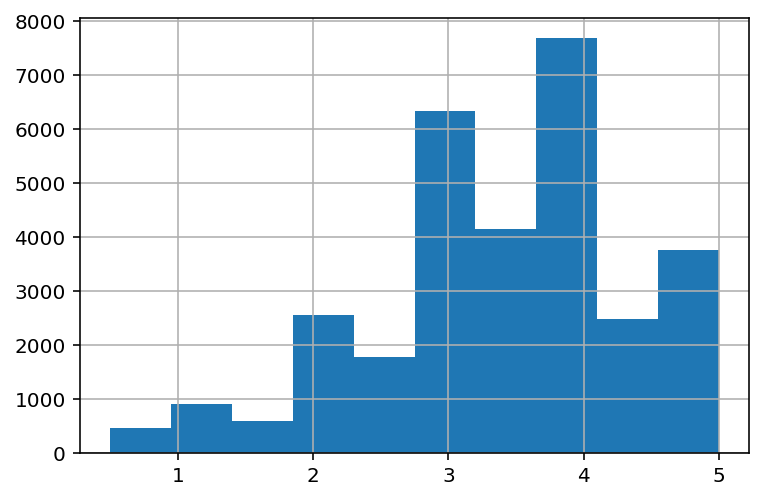

In [37]:
# посмотрим на гистограмму распределения оценок
r_actions['rating'].hist(bins = 10)

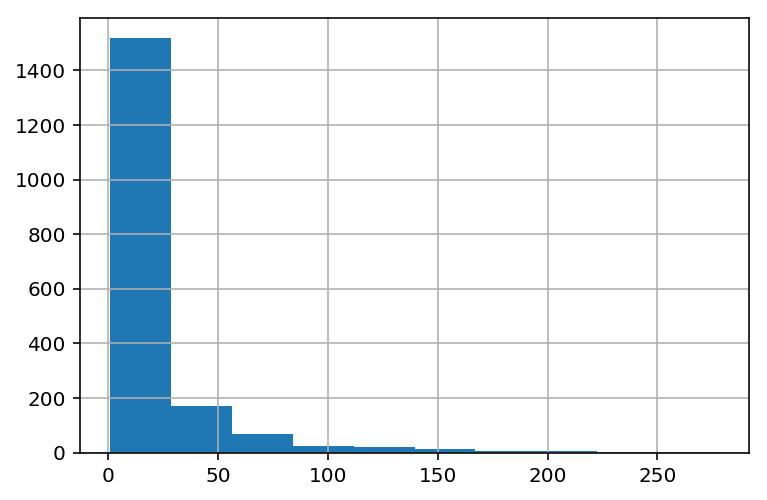

In [42]:
# гистограмма по количеству оценок на фильм
r_actions.groupby('title')['rating'].count().hist()

In [93]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for title, group in r_actions.groupby('title'):
    title_num_ratings[title] = group['userId'].unique().shape[0]

In [ ]:
# посмотрим на top-20 фильмов с оценками

In [94]:
sorted([(title_num_ratings[f],f) for f in title_num_ratings],key=lambda x:-x[0])[:20]

[(278, 'Matrix, The (1999)'),
 (251, 'Star Wars: Episode IV - A New Hope (1977)'),
 (238, 'Jurassic Park (1993)'),
 (237, 'Braveheart (1995)'),
 (224, 'Terminator 2: Judgment Day (1991)'),
 (218, 'Fight Club (1999)'),
 (211, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (202, 'Independence Day (a.k.a. ID4) (1996)'),
 (200,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (196, 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 (189, 'Batman (1989)'),
 (188, 'Saving Private Ryan (1998)'),
 (185, 'Lord of the Rings: The Return of the King, The (2003)'),
 (178, 'True Lies (1994)'),
 (171, 'Speed (1994)'),
 (170, 'Gladiator (2000)'),
 (165, 'Men in Black (a.k.a. MIB) (1997)'),
 (162, 'Mission: Impossible (1996)'),
 (157, 'Mask, The (1994)'),
 (149, 'Dark Knight, The (2008)')]

In [95]:
# достанем простые статистики по количеству рейтингов
min_num_r_action = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_r_action = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_r_action = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_r_action = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [96]:
print(min_num_r_action)
print(max_num_r_action)
print(mean_num_r_action)
print(median_num_r_action)

1
278
16.766830870279147
5.0


In [97]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for title, group in r_actions.groupby('title'):
    title_mean_rating[title] = group['rating'].mean()

In [117]:
film_with_our_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.keys():
    film_with_our_mark.append(
        (f, title_mean_rating[f] * (title_num_ratings[f] - mean_num_r_action) / (max_num_r_action - min_num_r_action),\
        np.unique(r_actions['genres'][r_actions['title']==f])[0])
    )                

In [118]:
#топ 20
list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]

[('Matrix, The (1999)', 3.9538121525684975, 'Action|Sci-Fi|Thriller'),
 ('Star Wars: Episode IV - A New Hope (1977)',
  3.5778276873123183,
  'Action|Adventure|Sci-Fi'),
 ('Braveheart (1995)', 3.205422673665224, 'Action|Drama|War'),
 ('Fight Club (1999)', 3.1041747597843043, 'Action|Crime|Drama|Thriller'),
 ('Jurassic Park (1993)',
  2.9950338781099397,
  'Action|Adventure|Sci-Fi|Thriller'),
 ('Terminator 2: Judgment Day (1991)', 2.9708274874433775, 'Action|Sci-Fi'),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)',
  2.9560183403919225,
  'Action|Adventure|Sci-Fi'),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  2.78322584517437,
  'Action|Adventure'),
 ('Star Wars: Episode VI - Return of the Jedi (1983)',
  2.6773392058535994,
  'Action|Adventure|Sci-Fi'),
 ('Saving Private Ryan (1998)', 2.5631049876453145, 'Action|Drama|War'),
 ('Lord of the Rings: The Return of the King, The (2003)',
  2.5015840545779544,
  'Action|Adventure|Drama|Fan

### Проделаем аналогичные операции с жанром Comedy

In [119]:
r_comedy = joined_ratings[joined_ratings.apply(lambda x:'Comedy' in x['genres'],axis = 1)]

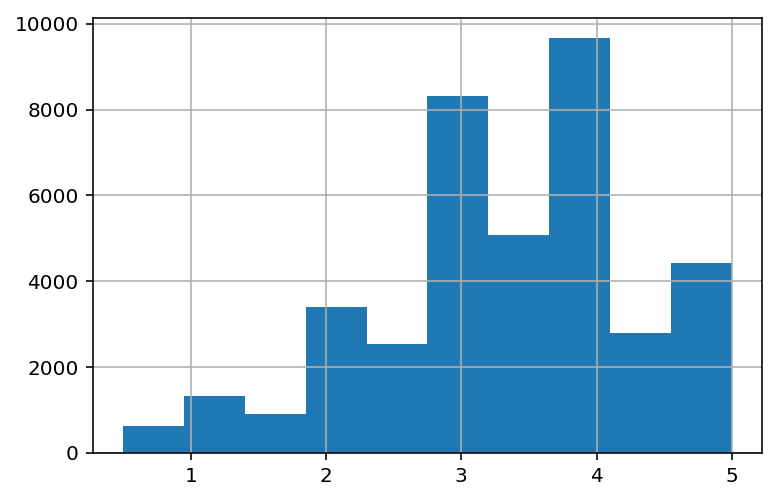

In [120]:
# посмотрим на гистограмму распределения оценок
r_comedy['rating'].hist(bins = 10)

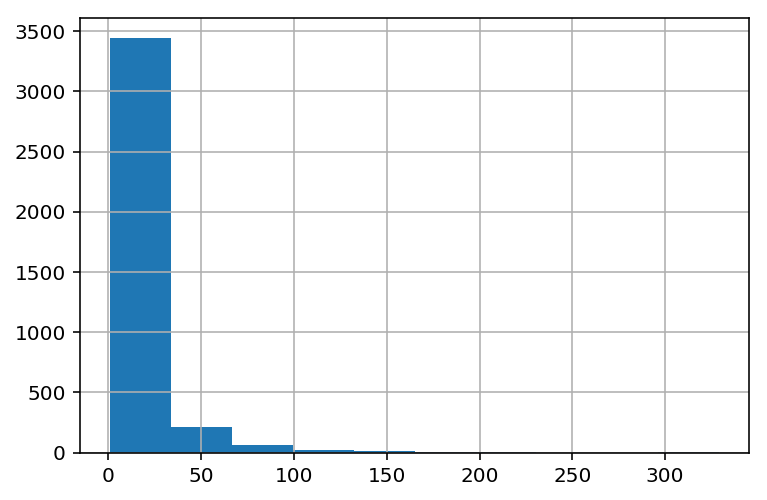

In [121]:
# гистограмма по количеству оценок на фильм
r_comedy.groupby('title')['rating'].count().hist()

In [122]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for title, group in r_comedy.groupby('title'):
    title_num_ratings[title] = group['userId'].unique().shape[0]

In [ ]:
# посмотрим на top-20 фильмов с оценками

In [123]:
sorted([(title_num_ratings[f],f) for f in title_num_ratings],key=lambda x:-x[0])[:20]

[(329, 'Forrest Gump (1994)'),
 (307, 'Pulp Fiction (1994)'),
 (215, 'Toy Story (1995)'),
 (183, 'Aladdin (1992)'),
 (181, 'Fargo (1996)'),
 (178, 'True Lies (1994)'),
 (171, 'Back to the Future (1985)'),
 (170, 'Shrek (2001)'),
 (165, 'Men in Black (a.k.a. MIB) (1997)'),
 (161, 'Ace Ventura: Pet Detective (1994)'),
 (157, 'Mask, The (1994)'),
 (149, 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)'),
 (144, 'Mrs. Doubtfire (1993)'),
 (143, 'Groundhog Day (1993)'),
 (142, 'Princess Bride, The (1987)'),
 (141, 'Finding Nemo (2003)'),
 (137, 'Batman Forever (1995)'),
 (136, 'Monty Python and the Holy Grail (1975)'),
 (135, 'Pretty Woman (1990)'),
 (133, 'Dumb & Dumber (Dumb and Dumber) (1994)')]

In [124]:
# достанем простые статистики по количеству рейтингов
min_num_r_comedy = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_r_comedy = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_r_comedy = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_r_comedy = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [125]:
print(min_num_r_comedy)
print(max_num_r_comedy)
print(mean_num_r_comedy)
print(median_num_r_comedy)

1
329
10.408315565031982
3.0


In [126]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for title, group in r_comedy.groupby('title'):
    title_mean_rating[title] = group['rating'].mean()

In [127]:
film_with_our_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.keys():
    film_with_our_mark.append(
        (f, title_mean_rating[f] * (title_num_ratings[f] - mean_num_r_comedy) / (max_num_r_comedy - min_num_r_comedy),\
        np.unique(r_comedy['genres'][r_comedy['title']==f])[0])
    ) 

In [129]:
a =list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]

In [144]:
pd.Series(a)

0     (Forrest Gump (1994), 4.044690189004988, Comed...
1     (Pulp Fiction (1994), 3.7951694744027207, Come...
2     (Toy Story (1995), 2.44570036838738, Adventure...
3     (Fargo (1996), 2.1407290948667828, Comedy|Crim...
4     (Aladdin (1992), 1.995512278386442, Adventure|...
5     (Back to the Future (1985), 1.9770460366271827...
6     (Shrek (2001), 1.8818424052365759, Adventure|A...
7     (True Lies (1994), 1.7868906474508017, Action|...
8     (Princess Bride, The (1987), 1.698011901954134...
9     (Men in Black (a.k.a. MIB) (1997), 1.643893466...
10    (Pirates of the Caribbean: The Curse of the Bl...
11    (Groundhog Day (1993), 1.5943567717320903, Com...
12    (Monty Python and the Holy Grail (1975), 1.593...
13    (Finding Nemo (2003), 1.5770510239778939, Adve...
14    (Monsters, Inc. (2001), 1.4350829348269738, Ad...
15    (Mask, The (1994), 1.4233307871967535, Action|...
16    (Amelie (Fabuleux destin d'Amélie Poulain, Le)...
17    (Ace Ventura: Pet Detective (1994), 1.3958

In [128]:
#топ 20
list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]

[('Forrest Gump (1994)', 4.044690189004988, 'Comedy|Drama|Romance|War'),
 ('Pulp Fiction (1994)', 3.7951694744027207, 'Comedy|Crime|Drama|Thriller'),
 ('Toy Story (1995)',
  2.44570036838738,
  'Adventure|Animation|Children|Comedy|Fantasy'),
 ('Fargo (1996)', 2.1407290948667828, 'Comedy|Crime|Drama|Thriller'),
 ('Aladdin (1992)',
  1.995512278386442,
  'Adventure|Animation|Children|Comedy|Musical'),
 ('Back to the Future (1985)', 1.9770460366271827, 'Adventure|Comedy|Sci-Fi'),
 ('Shrek (2001)',
  1.8818424052365759,
  'Adventure|Animation|Children|Comedy|Fantasy|Romance'),
 ('True Lies (1994)',
  1.7868906474508017,
  'Action|Adventure|Comedy|Romance|Thriller'),
 ('Princess Bride, The (1987)',
  1.6980119019541347,
  'Action|Adventure|Comedy|Fantasy|Romance'),
 ('Men in Black (a.k.a. MIB) (1997)',
  1.6438934662291962,
  'Action|Comedy|Sci-Fi'),
 ('Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
  1.5965607778868676,
  'Action|Adventure|Comedy|Fantasy'),
 ('Groundhog Da